## Labb
- Syftet med denna labb var att använda verktygen vi hade lärt oss i Python för att implementera en förenklad maskininlärningsalgorithm.
- Vi fick simulerad data på Pichus och Pikachus längder och bredder. Vi skapade sedan en algorithm som baserat på den givna datan kunde avgöra om en ny datapunkt ska klassificeras som Pichu eller Pikachu.

There are 5 out of both types, but the Pichu points are closer!


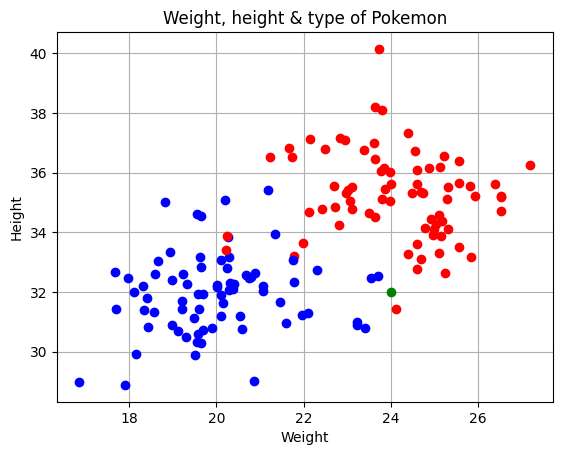

In [3]:
from math import sqrt # needed squareroot for euclidian distance
import matplotlib.pyplot as plt # needed for our graphs

#----------------------------------------------------  TEXTFILE IMPORT-------------------------------------------------------
with open ("../Data/datapoints.txt", "r") as data_read:
    lines = data_read.readlines()
    lines = lines[1:] # removes first line in the list

    # Create 3 lists in order to separate each line and append correct info with corresponding list
    poke_width = [] # width numbers
    poke_height = [] # height numbers
    poke_type = [] # types

    # First for loop goes through every line in the text document, second for loop goes through every split.
    for label in lines:
        w, h, t = [eval(_) for _ in label.split(",")] # Had help from Kevin for this line of the code.
        # convert to float and splits on ",", which makes 3 splits on each line
        # 'eval' in this case evaluates if the string input can be converted to an integer or a float. 
        # Since it's numbers in a string format for our use, it can be converted to float.
        # Source: https://www.mygreatlearning.com/blog/eval-in-python/ 

        poke_width.append(w) # first split is appended to width list
        poke_height.append(h) # second split is appended to height list
        poke_type.append(t)  # third split is appended to type list
    
    # function with correctly formated test points from text file
    def test_numbers_formated(): # is not used for exercise 1 & 2, was just used to classify test data
        with open ("../Data/testpoints.txt", "r") as file: # loads our test-data
            lines = file.readlines()
            lines = lines[1:]

            # Create two more lists for testpoints, which doesn't have a type yet
            test_width = []
            test_height = []

            for line in lines:# Since testpoints.txt had a different format, we need to change how cleaned and split the numbers
                line = line[4:-2] # starts at the fourth point from the textfile, which removes unnecessary text/numbers. "-2" starts from next to last item (last item is removed).
                test_w, test_h = [eval(_) for _ in line.split(",")] # format to float, split and append like our first three lists (except for type)
                test_width.append(test_w)
                test_height.append(test_h)
    

    #----------------------------------------------INPUT & ERROR-HANDLING------------------------------------------------------

    while True: # uses a while loop because if the input is incorrect, then the user can try again without exiting the program
        userinput1 = input("What's the width?")
        try:
            userinput1 = float(userinput1)
            if userinput1 < 0 or userinput1 > 100: # specific error message if the input is below 0 or above 100
                raise ValueError(f"Fel, ange ett nummer mellan 1 till 100, inte: {userinput1}")
            break # while loop breaks if the input is within the rules
        except ValueError as err: # error message for string inputs
            print(f"funkar inte med {userinput1}, försök igen med siffror mellan 1 till 100")
    
    # same as above but for user input nr 2
    while True:
        userinput2 = input("What's the height?")
        try:
            userinput2 = float(userinput2)
            if userinput2 < 0 or userinput2 > 100:
                raise ValueError(f"Fel, ange ett nummer mellan 1 till 100, inte: {userinput2}")
            break
        except ValueError as err:
            print(f"funkar inte med {userinput2}, försök igen med siffror mellan 1 till 100")

    #-----------------------------------------PLOTTING DATA POINTS & USER INPUT-------------------------------------------------

    def plot_grid():
        for ww, hh, tt in zip(poke_width, poke_height, poke_type): # Create 3 new variables that is ziped with our split lists.
                    # Zip lets us merge width, height and type list onto a new variable, 
                    # which is needed for us to be able to display the type color on the graph
            if tt == 0: 
                pallet = "blue" # checks if the value of 'type' is 0 or 1. 
            else:               # changes 'pallet' color, which makes the graph much more readable
                    pallet = "red"
            plt.plot(ww, hh, "o", color=pallet) # plt.plot needs to be in for loop in order for every point to be plotted
        plt.plot(userinput1, userinput2, marker="o", color="green")  # also plots the userinputs in another color for easier viewing  
        plt.grid() # Gives graph a grid (easier to read)
        plt.title("Weight, height & type of Pokemon") # titles and labels
        plt.xlabel("Weight") 
        plt.ylabel("Height") 

    #----------------------------------------EUCLIDIAN DISTANCE & DISTANCE LISTS---------------------------------------------------

    # Adds two user inputs for width and height, and correct error handling.

    dist_list = [] # created a new list that can hold euclidian distance

    for width, height, label, in zip (poke_width, poke_height, poke_type): # Creates a new list with the euclidian distance from test points 
        distance = sqrt((userinput1 - width)**2 + (userinput2 - height)**2)
        dist_list.append([distance, label])

    dist_list.sort() # sorts the list with the calculations of euclidian distance from the user inputs.

    # creates two new lists in order to put the distance points in them.
    # when we do this we can later compare the sum of both lists and see which points are closer
    pika_dist = [] 
    pichu_dist = []

    # Checks the 10 closest points from the sorted list
    # Adds a counter that will check the type of the points
    counter = 0
    for n in range (10):
        if dist_list[n][1]: # checks the sorted list lines 1 through 10, if the type is 1, adds one to counter
            counter += 1 # recieved help from Max on how to set up this for-loop.
            pika_dist.append(dist_list[n][0]) 
        else: # puts distances in two separate type-lists
            pichu_dist.append(dist_list[n][0])

    #---------------------------------------------------VOTING SYSTEM----------------------------------------------------------------
    
    # based on the counter (types), the if-statement will choose which type the user input is
    if counter > 5:
        print(f"It's a Pikachu! {counter} out of the 10 closest points are Pikachu")
    elif counter == 5:
        if sum(pika_dist) > sum(pichu_dist): # compares the two distance lists, checks which sum is smaller - smaller = closer
            print("There are 5 out of both types, but the Pichu points are closer!")
        else:
            print("There are 5 out of both types, but the Pikachu points are closer!")
    else:                       
        print(f"It's a Picchu! {10 - counter} out of the 10 closest points are Picchu")
                             # reverses the point counter so we can use it for Picchu aswell
    
    plot_grid()

    # This code was written for the most part with Jonas, and we've both contributed equally to the project.